## Stability

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot
%matplotlib inline

In [13]:
def linear_convection(nx, L = 2.0, c=1.0, dt = 0.025, nt = 20):
    # Discretize Spatial Grid
    dx = L / (nx - 1)
    x = np.linspace(0.0, L, num=nx)
    
    # Set IC
    u0 = np.ones(nx)
    mask = np.where((x >= 0.5) & (x <= 1.0))
    u0[mask] = 2.0
    
    # Integrate Solution in Time
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
        
    # Solution is Plotted with IC
    pyplot.figure(figsize=(4.0,4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial', color = 'C6', linestyle = '-', linewidth = 2)
    pyplot.plot(x, u, label = 'nt={}'.format(nt), color = 'C2', linestyle = '--', linewidth = 2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5)
    

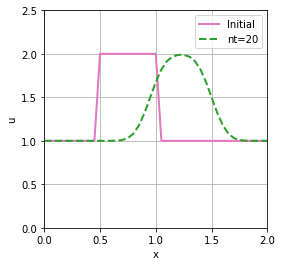

In [14]:
linear_convection(41)        #calling function linear_convection for 41 spatial grid points

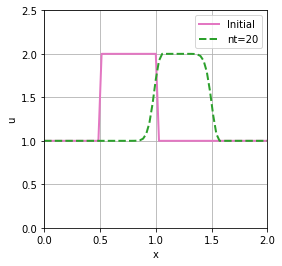

In [15]:
linear_convection(71)

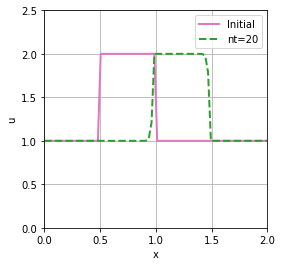

In [18]:
linear_convection(80)

In [34]:
def linear_conv_cfl(nx, L=2.0, c=1.0, sigma=0.5, nt=20):
    """
    Solves 1D linear convection equation on domain [0,L] 
    --------------------------------------------------
    nx = integer: num of grid points
    L = float, optional: length of domain
    c = float, optional: convection speed
    sigma = float, optional: CFL constraint, mustnt be larger than sigma_max
    dt = float, optional: time step size
    nt = integer, optional: number of time steps to computer
    """
    # Discretize Spatial Grid
    dx = L / (nx-1)
    x = np.linspace(0.0, L, num=nx)
    
    # Time Step based on CFL Constraint
    dt = sigma*dx / c
    
    # Set IC
    u0 = np.ones(nx)
    mask = np.where((x>=0.5)&(x <=1.0))
    u0[mask] = 2.0
    
    # Integrate over Time
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c* dt / dx * (u[1:] - u[:-1])
        
    # Plot IC and Solution
    pyplot.figure(figsize=(4.0,4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial', color = 'C6', linestyle='--')
    pyplot.plot(x, u, label='nt={}'.format(nt), color = 'C2', linestyle=':')
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5)
    

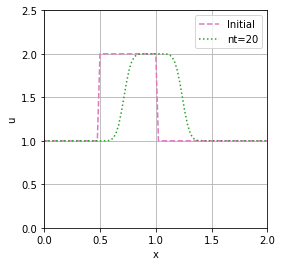

In [35]:
linear_conv_cfl(85)

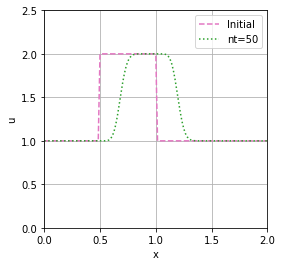

In [37]:
linear_conv_cfl(129,sigma = 0.25, nt=50)

Able to assign values to variables in definition when calling the function